In [1]:
import numpy as np
import cv2
import os
from keras.layers import Input
from model_arch2 import VGG16
import matplotlib.pyplot as plt
    
def padding(x):
    h,w,c = x.shape
    size = max(h,w)
    paddingh = (size-h)//2
    paddingw = (size-w)//2
    temp_x = np.zeros((size,size,c))
    temp_x[paddingh:h+paddingh,paddingw:w+paddingw,:] = x
    return temp_x

def load_image(path):
    x = cv2.imread(path)
    sh = x.shape
    x = np.array(x, dtype=np.float32)
    x = x[..., ::-1]
    # Zero-center by mean pixel
    x[..., 0] -= 103.939
    x[..., 1] -= 116.779
    x[..., 2] -= 123.68
    x = padding(x)
    x = np.expand_dims(x,0)
    return x,sh

def cut(pridict,shape):
    h,w,c = shape
    size = max(h, w)
    pridict = cv2.resize(pridict, (size,size))
    paddingh = (size - h) // 2
    paddingw = (size - w) // 2
    return pridict[paddingh:h + paddingh, paddingw:w + paddingw]

def sigmoid(x):
    return 1/(1 + np.exp(-x))

Using TensorFlow backend.
C:\Users\sahan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sahan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sahan\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sahan\Anaconda3\envs\te

In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

model_name ='model/DUTLF_train/PFA_00020.h5'
input_size=(4608,4608)
target_size = (256,256)

dropout = False
with_CPFE = True
with_CA = True
with_SA = True

if target_size[0 ] % 32 != 0 or target_size[1] % 32 != 0:
    raise ValueError('Image height and wight must be a multiple of 32')

model_input = Input(shape=(input_size[0],input_size[1],3))
model = VGG16(model_input,dropout=dropout, with_CPFE=with_CPFE, with_CA=with_CA, with_SA=with_SA)
model.load_weights(model_name)#,by_name=True)

for layer in model.layers:
    layer.trainable = False









(?, 256, 256, 1)


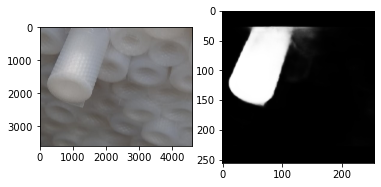

In [5]:
image_path = 'lightfield_dataset_new/dutlf/0314.jpg'
img, shape = load_image(image_path)
sa = model.predict(img)
sa1=sigmoid(sa)*255
pridict = np.round(sa1)
sa=np.squeeze(pridict)
plt.title('saliency')
plt.subplot(121)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2BGR))
plt.subplot(122)
plt.imshow(sa,cmap='gray')
plt.show()

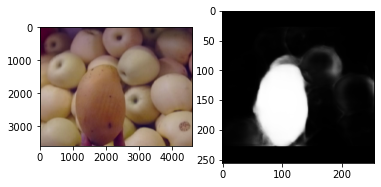

In [6]:
image_path = 'lightfield_dataset_new/dutlf/0090.jpg'
img, shape = load_image(image_path)
sa = model.predict(img)
sa1=sigmoid(sa)*255
pridict = np.round(sa1)
sa=np.squeeze(pridict)
plt.title('saliency')
plt.subplot(121)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2BGR))
plt.subplot(122)
plt.imshow(sa,cmap='gray')
plt.show()

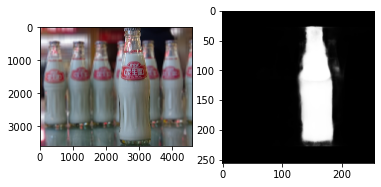

In [7]:
image_path = 'lightfield_dataset_new/dutlf/0126.jpg'
img, shape = load_image(image_path)
sa = model.predict(img)
sa1=sigmoid(sa)*255
pridict = np.round(sa1)
sa=np.squeeze(pridict)
plt.title('saliency')
plt.subplot(121)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2BGR))
plt.subplot(122)
plt.imshow(sa,cmap='gray')
plt.show()

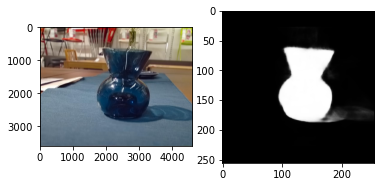

In [10]:
image_path = 'lightfield_dataset_new/dutlf/0112.jpg'
img, shape = load_image(image_path)
sa = model.predict(img)
sa1=sigmoid(sa)*255
pridict = np.round(sa1)
sa=np.squeeze(pridict)
plt.title('saliency')
plt.subplot(121)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2BGR))
plt.subplot(122)
plt.imshow(sa,cmap='gray')
plt.show()

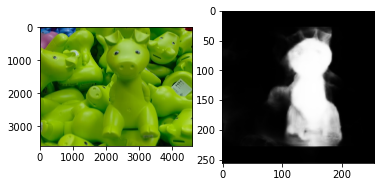

In [9]:
image_path = 'lightfield_dataset_new/dutlf/0140.jpg'
img, shape = load_image(image_path)
sa = model.predict(img)
sa1=sigmoid(sa)*255
pridict = np.round(sa1)
sa=np.squeeze(pridict)
plt.title('saliency')
plt.subplot(121)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2BGR))
plt.subplot(122)
plt.imshow(sa,cmap='gray')
plt.show()